In [6]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

Lung Cancer Detection (Classification)

Description:
In this project, you will build a machine learning model to classify the stage of lung cancer given all other attributes. This is a classic example of a classification problem in machine learning.

Learning Curve:

Data Exploration and Preprocessing:
Familiarize yourself with the dataset by exploring the data distribution, missing values, and data types.
Learn about data preprocessing techniques like handling missing values, normalization, and feature scaling. Preprocess the data to prepare it for model training.
Model Selection and Training:
Research different classification algorithms like Logistic Regression, Support Vector Machines (SVM), Decision Trees, or Random Forests.
Split the data into training and testing sets. Train your model on the training data and evaluate its performance on the testing data.
Experiment with different hyperparameter configurations to improve the model's accuracy.

In [7]:
df = pd.read_csv('lung_cancer_data.csv')

In [8]:
df.head()

,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,Patient0000,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,Patient0001,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,Patient0002,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,Patient0003,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,Patient0004,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


In [9]:
df.describe()

,Age,Tumor_Size_mm,Survival_Months,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,Platelet_Count,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
count,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,...,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000
mean,54.439344,55.383736,59.863809,1.999915,134.462381,84.475780,79.585299,14.000137,6.735637,299.867482,...,22.504677,30.133226,0.999459,174.734575,9.261114,3.742771,109.895553,4.245646,140.028215,49.913594
std,14.396386,26.004354,34.246042,1.413675,26.020492,14.409826,11.546690,2.301411,1.879292,86.897568,...,10.047864,11.560915,0.287517,43.230997,0.719875,0.721708,23.109136,0.431968,2.894568,28.870940
min,30.000000,10.004279,1.000000,0.000000,90.000000,60.000000,60.000000,10.000070,3.501213,150.017892,...,5.001090,10.000860,0.500001,100.002721,8.000018,2.500069,70.000420,3.500034,135.000934,0.016800
25%,42.000000,32.972797,30.000000,1.000000,112.000000,72.000000,70.000000,11.990625,5.108723,224.884576,...,13.816180,20.065339,0.748845,137.444977,8.640877,3.120107,89.828616,3.871842,137.540078,25.026793
50%,54.000000,55.296297,60.000000,2.000000,134.000000,85.000000,80.000000,13.983383,6.729774,299.933443,...,22.547943,30.271772,1.001183,174.390634,9.259304,3.730837,109.949488,4.242236,140.002209,49.926220
75%,67.000000,78.190014,89.000000,3.000000,157.000000,97.000000,90.000000,15.999260,8.353701,375.437029,...,31.092935,40.107488,1.249173,212.228273,9.883248,4.364422,130.061977,4.618318,142.541883,74.924580
max,79.000000,99.990554,119.000000,4.000000,179.000000,109.000000,99.000000,17.999957,9.999535,449.974734,...,39.999543,49.998571,1.499998,249.996391,10.499913,4.999974,149.997056,4.999954,144.999869,99.999493


In [10]:
df.shape

(23658, 38)

In [11]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Smoking_History', 'Tumor_Size_mm',
       'Tumor_Location', 'Stage', 'Treatment', 'Survival_Months', 'Ethnicity',
       'Insurance_Type', 'Family_History', 'Comorbidity_Diabetes',
       'Comorbidity_Hypertension', 'Comorbidity_Heart_Disease',
       'Comorbidity_Chronic_Lung_Disease', 'Comorbidity_Kidney_Disease',
       'Comorbidity_Autoimmune_Disease', 'Comorbidity_Other',
       'Performance_Status', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level',
       'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level',
       'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level',
       'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level',
       'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level',
       'Sodium_Level', 'Smoking_Pack_Years'],
      dtype='object')

In [12]:
df.nunique()

Patient_ID                          23658
Age                                    50
Gender                                  2
Smoking_History                         3
Tumor_Size_mm                       23658
Tumor_Location                          3
Stage                                   4
Treatment                               4
Survival_Months                       119
Ethnicity                               5
Insurance_Type                          4
Family_History                          2
Comorbidity_Diabetes                    2
Comorbidity_Hypertension                2
Comorbidity_Heart_Disease               2
Comorbidity_Chronic_Lung_Disease        2
Comorbidity_Kidney_Disease              2
Comorbidity_Autoimmune_Disease          2
Comorbidity_Other                       2
Performance_Status                      5
Blood_Pressure_Systolic                90
Blood_Pressure_Diastolic               50
Blood_Pressure_Pulse                   40
Hemoglobin_Level                  

In [13]:
a = df['Treatment'].unique()
b = df['Stage'].unique()
print('Types of treatment:', a)
print('Types of Stages:', b)

Types of treatment: ['Surgery' 'Radiation Therapy' 'Chemotherapy' 'Targeted Therapy']
Types of Stages: ['Stage III' 'Stage I' 'Stage IV' 'Stage II']


In [14]:
df.isnull().any()
# since there are no null values, we shall not drop any rows

Patient_ID                          False
Age                                 False
Gender                              False
Smoking_History                     False
Tumor_Size_mm                       False
Tumor_Location                      False
Stage                               False
Treatment                           False
Survival_Months                     False
Ethnicity                           False
Insurance_Type                      False
Family_History                      False
Comorbidity_Diabetes                False
Comorbidity_Hypertension            False
Comorbidity_Heart_Disease           False
Comorbidity_Chronic_Lung_Disease    False
Comorbidity_Kidney_Disease          False
Comorbidity_Autoimmune_Disease      False
Comorbidity_Other                   False
Performance_Status                  False
Blood_Pressure_Systolic             False
Blood_Pressure_Diastolic            False
Blood_Pressure_Pulse                False
Hemoglobin_Level                  

In [15]:
# checking for data types other than object, int, and float.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23658 entries, 0 to 23657
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        23658 non-null  object 
 1   Age                               23658 non-null  int64  
 2   Gender                            23658 non-null  object 
 3   Smoking_History                   23658 non-null  object 
 4   Tumor_Size_mm                     23658 non-null  float64
 5   Tumor_Location                    23658 non-null  object 
 6   Stage                             23658 non-null  object 
 7   Treatment                         23658 non-null  object 
 8   Survival_Months                   23658 non-null  int64  
 9   Ethnicity                         23658 non-null  object 
 10  Insurance_Type                    23658 non-null  object 
 11  Family_History                    23658 non-null  object 
 12  Como

/Users/arnavagrawal/Desktop/lung_cancer_stage_predictor/lung/lib/python3.11/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


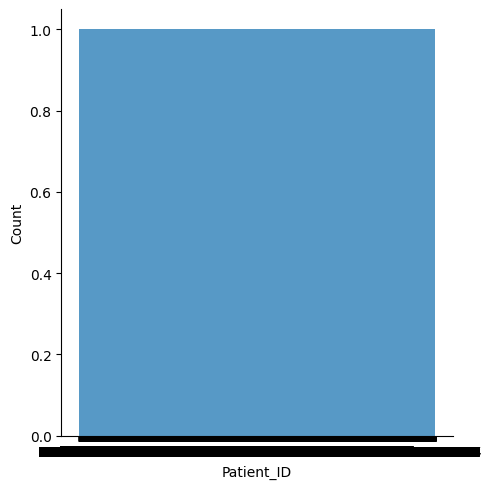

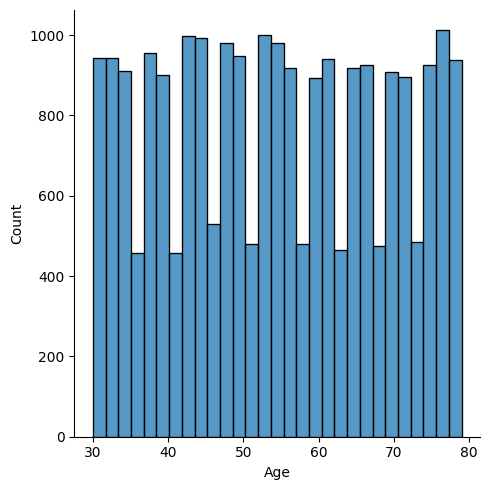

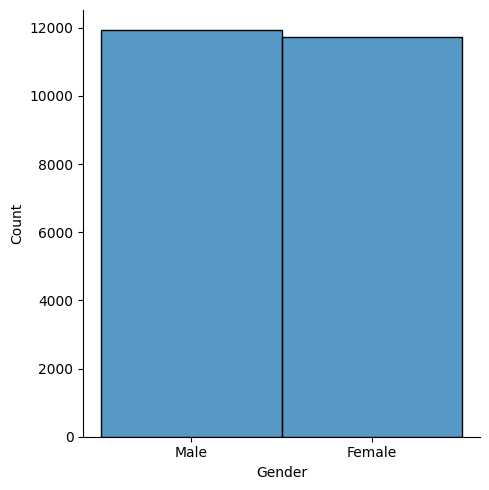

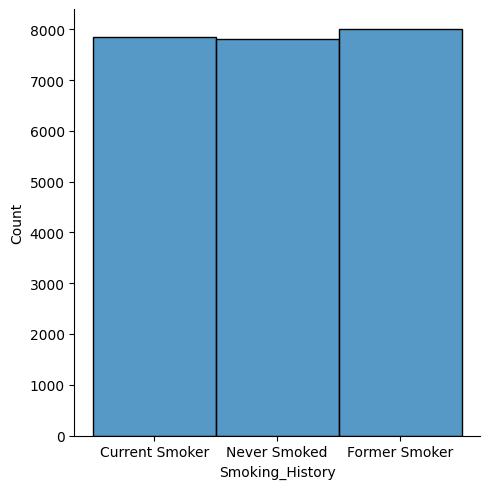

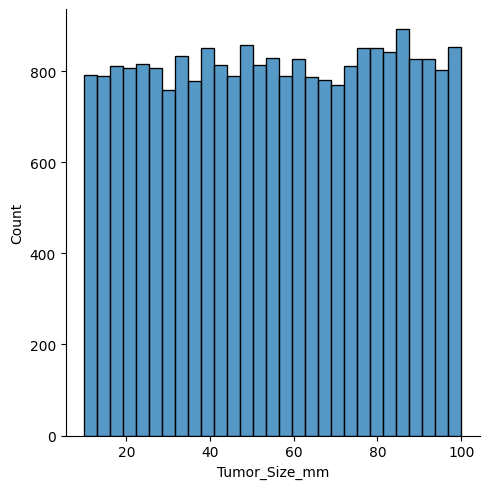

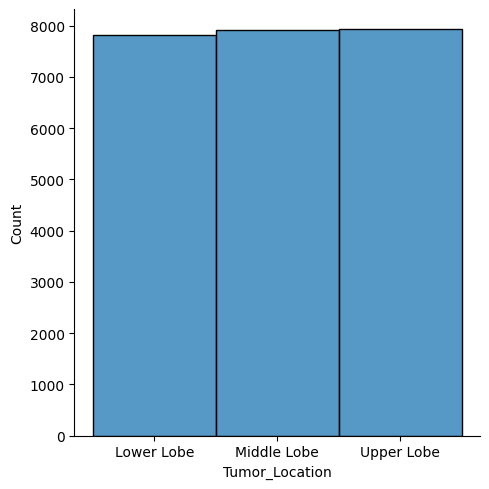

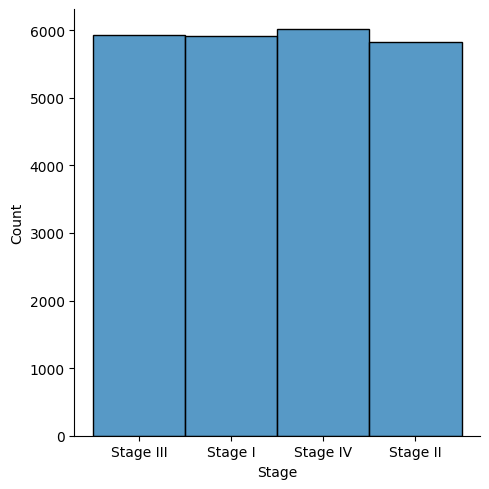

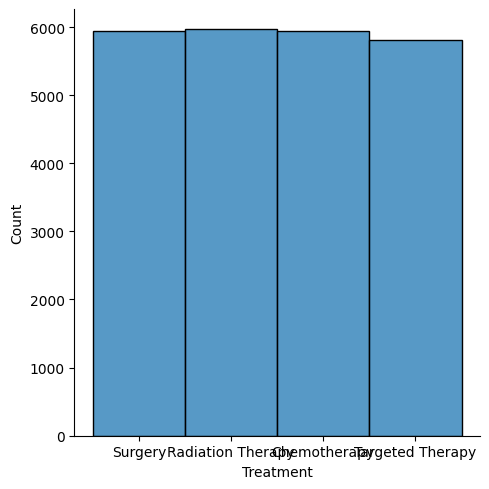

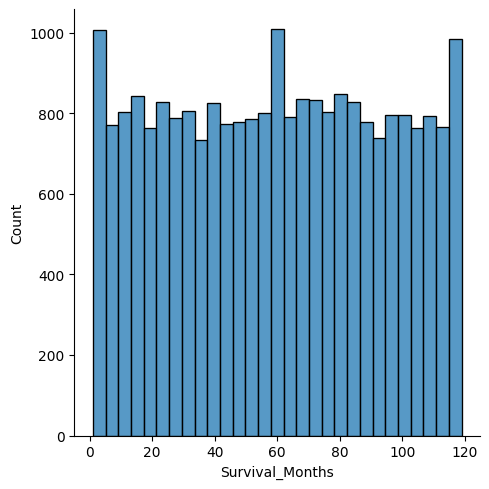

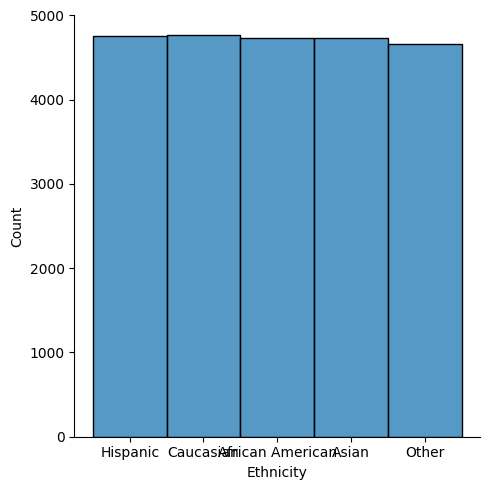

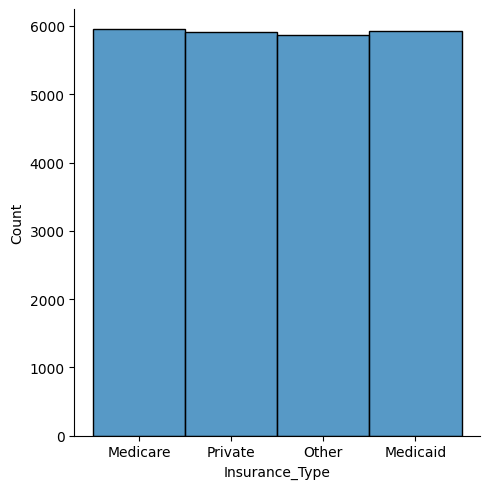

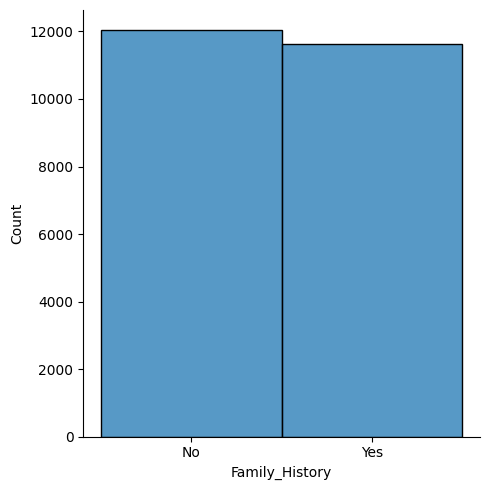

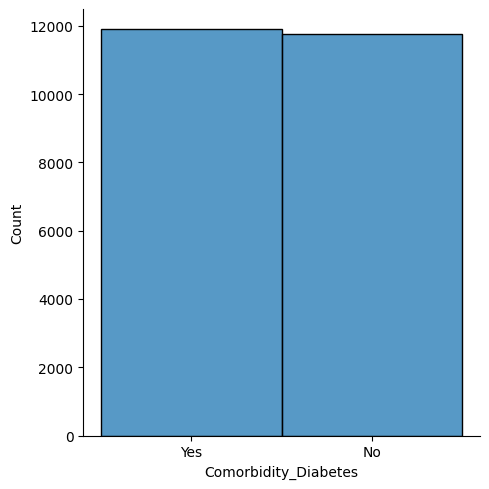

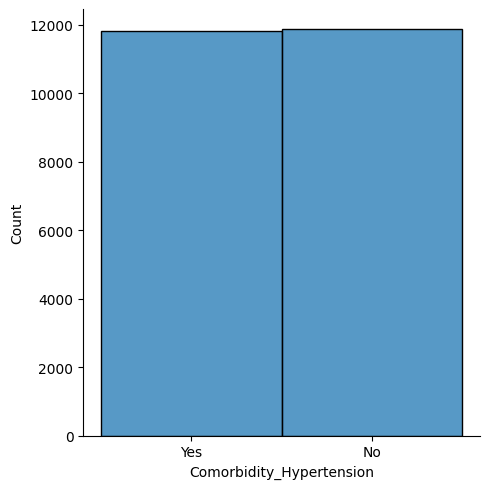

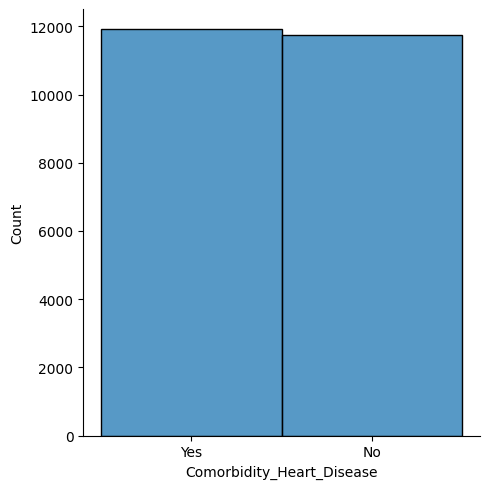

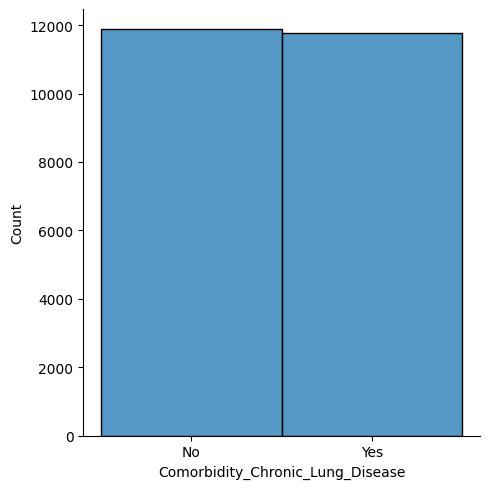

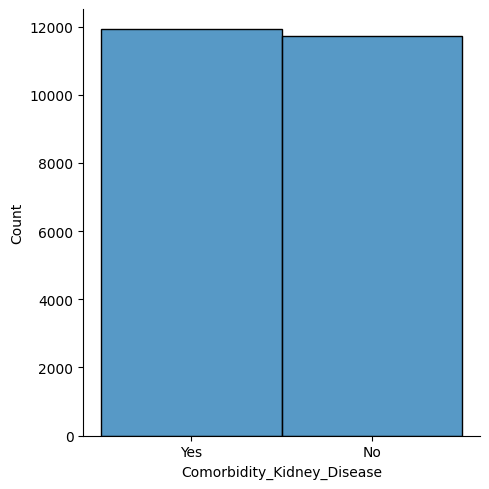

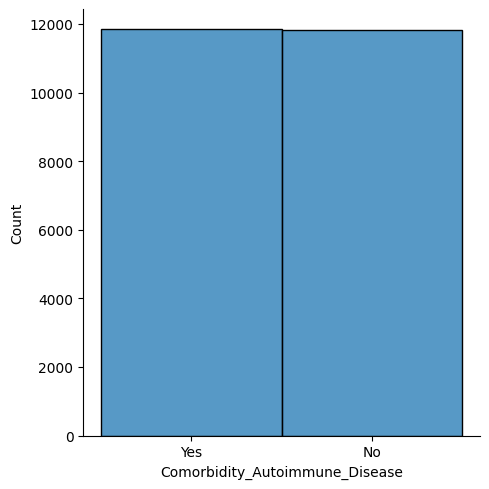

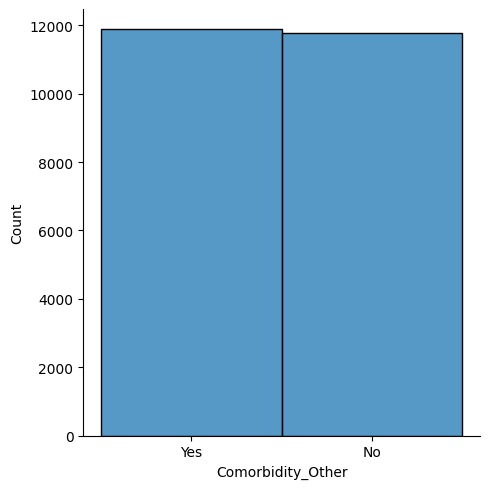

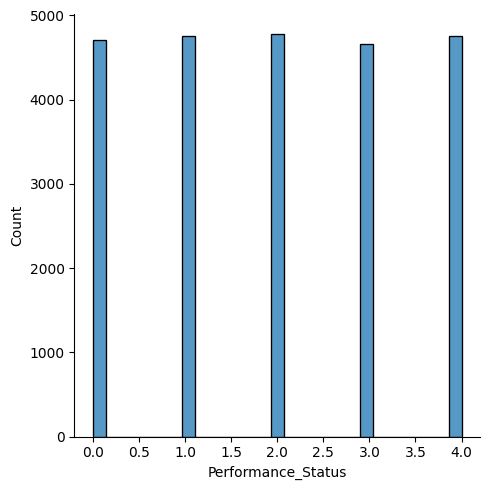

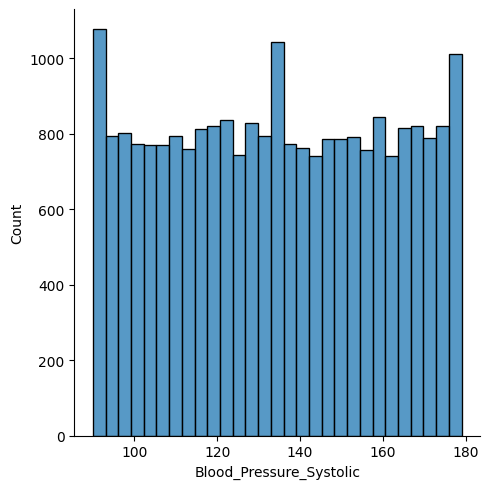

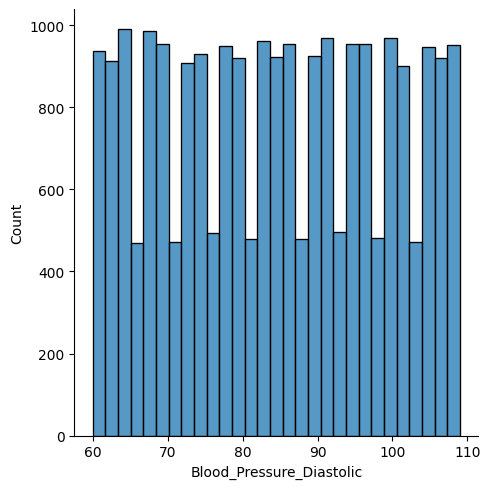

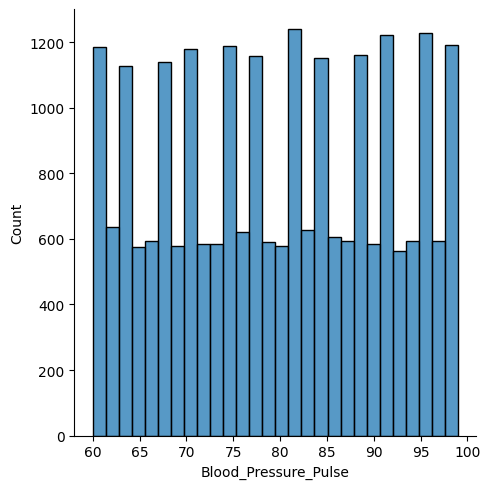

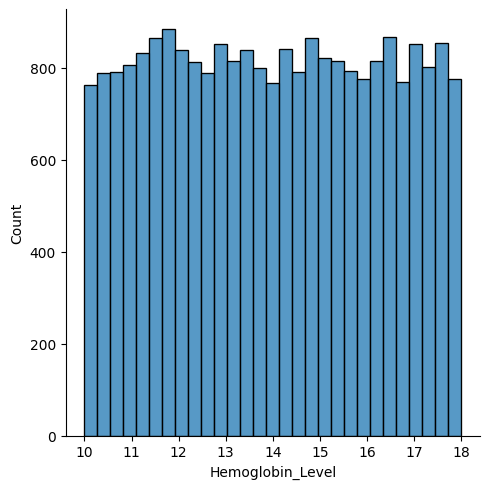

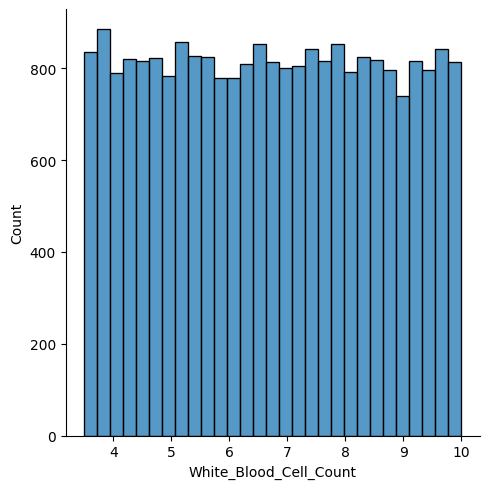

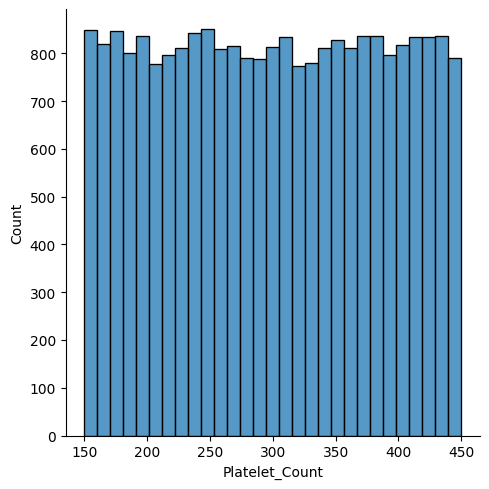

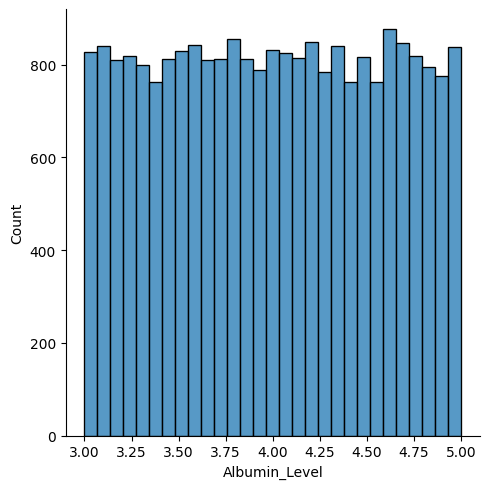

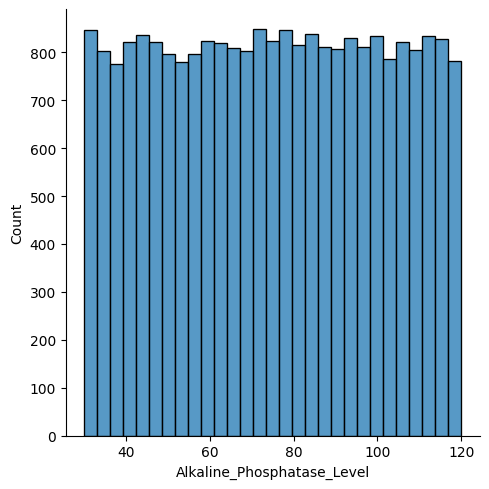

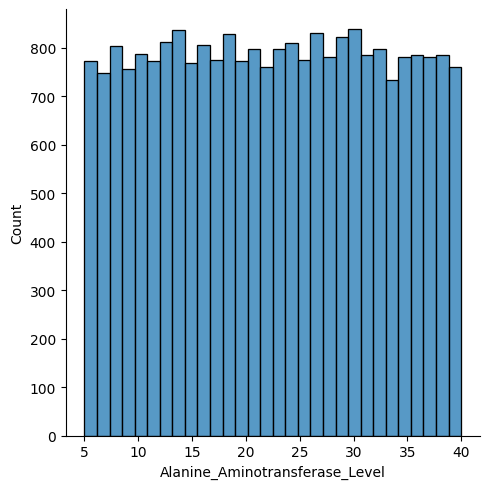

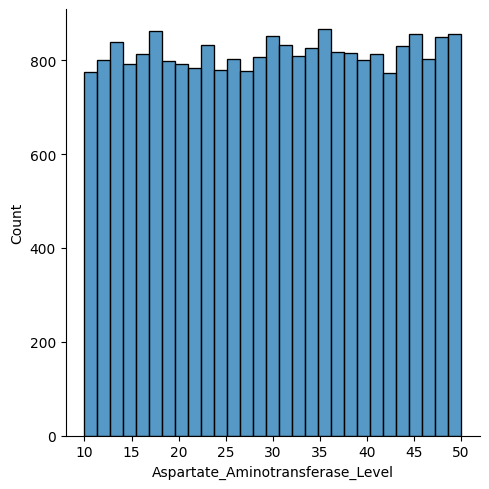

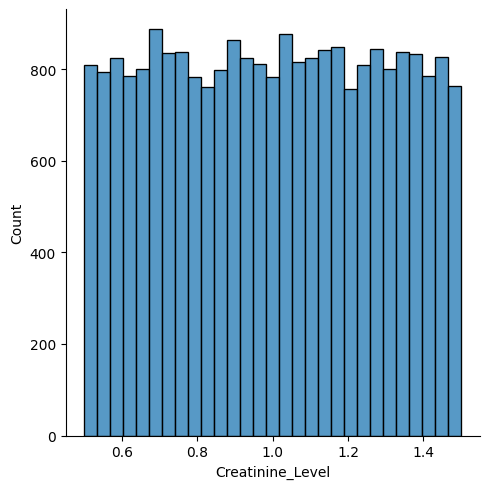

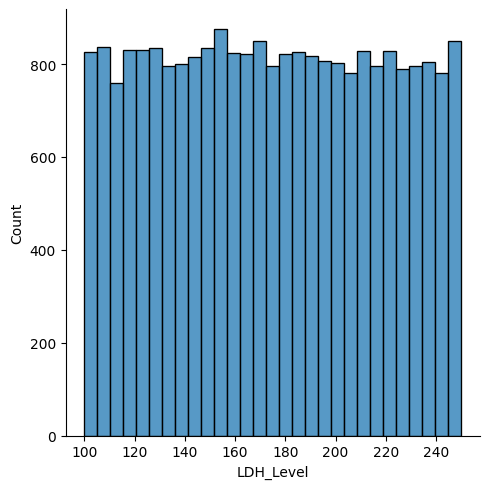

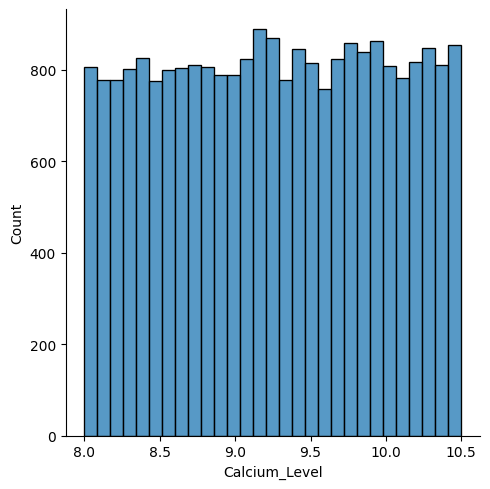

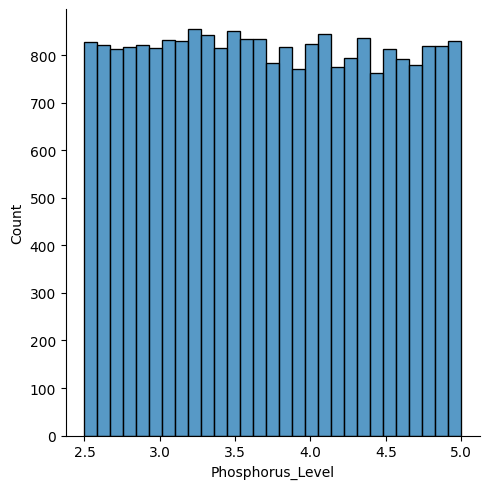

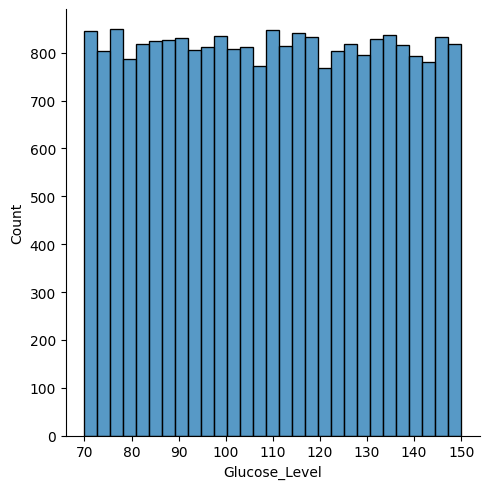

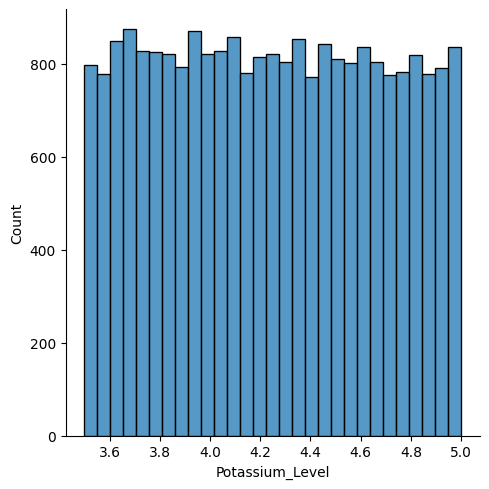

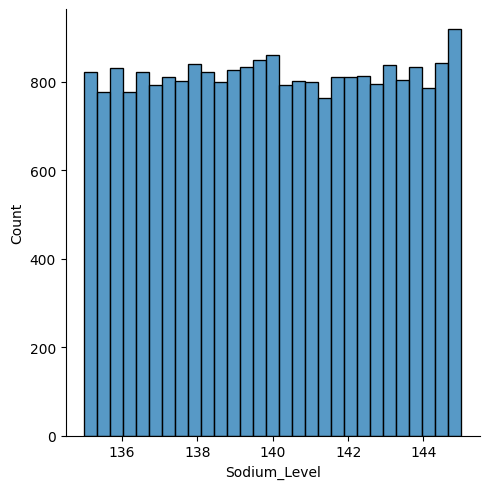

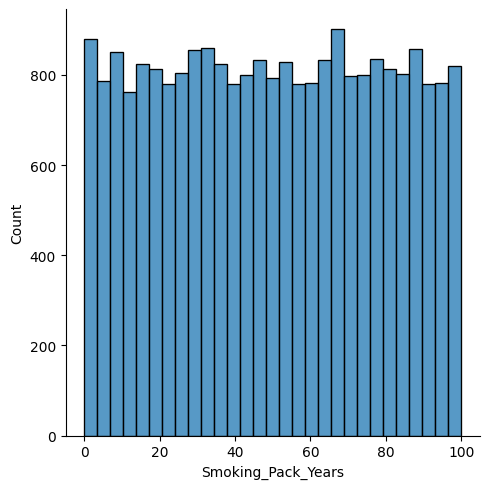

In [16]:
# sns.displot(df[''])
columns = list(df.columns) # creating a list of columns to iterate through 
for column in columns:
    sns.displot(df[f'{column}'])


In [17]:
# now, using Tukey's method to check if there are any outlier values on the x-axis

numeric_columns = df.select_dtypes(include=['int64', 'float64'])  # dataframe of columns with numeric values (int, float)
numeric_columns_list = list(numeric_columns.columns)  # list of columsn with numeric values (int, float)

categorical_columns_list = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(categorical_columns_list)
print(numeric_columns_list)



for column in numeric_columns_list:

# the following commented code will plot the box plots for the columns, and we can visually detect any ouliers
# however, it is not the most efficient method

    # sns.boxplot(x = df[column], orient = 'v')
    # plt.title(f'Box plot for {column}')
    # plt.xlabel(column)
    # plt.ylabel('Values')
    # plt.grid(True)
    # plt.show()

# instead, we will use TUKEY'S METHOD to detect outliers, which involves detecting extreme values based on the interquartile range

    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    outliers = df[(df[column] > upper_fence) | (df[column] < lower_fence)][column]
    print(outliers)

# output shows us that there are NO outliers


['Patient_ID', 'Gender', 'Smoking_History', 'Tumor_Location', 'Stage', 'Treatment', 'Ethnicity', 'Insurance_Type', 'Family_History', 'Comorbidity_Diabetes', 'Comorbidity_Hypertension', 'Comorbidity_Heart_Disease', 'Comorbidity_Chronic_Lung_Disease', 'Comorbidity_Kidney_Disease', 'Comorbidity_Autoimmune_Disease', 'Comorbidity_Other']
['Age', 'Tumor_Size_mm', 'Survival_Months', 'Performance_Status', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level', 'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level', 'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level', 'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level', 'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level', 'Sodium_Level', 'Smoking_Pack_Years']
Series([], Name: Age, dtype: int64)
Series([], Name: Tumor_Size_mm, dtype: float64)
Series([], Name: Survival_Months, dtype: int64)
Series([], Name: Performance_Status, dtype: int64)
Series([], N

In [18]:
# this block of code tries to find the correlation between various columns and the stage of cancer
# ALSO CONVERTS CATEGORICAL COLUMNS TO BINARY 


# # finding the correlation between the variables and the cancer stage to discover categories with robust implications

# from scipy.stats import spearmanr
# from sklearn.preprocessing import LabelEncoder

# # Create a LabelEncoder object
# label_encoder = LabelEncoder()

# # Encode the 'Stage' column
# df['Stage'] = label_encoder.fit_transform(df['Stage'])

# # Iterate through each column (excluding 'Stage')
# for column in df.columns:
#     # Fit the LabelEncoder to the column and transform it
#     df[column] = label_encoder.fit_transform(df[column])

#     # Calculate Spearman rank correlation coefficient
#     spearman_corr, p_value = spearmanr(df[column], df['Stage'])

#     # Print the correlation between the integer-encoded column and the 'Stage' column
#     print(f'Correlation between {column} and stage (after encoding):', spearman_corr)
#     print()



In [19]:
# let us create 2 seperate dataframes from our x_train- one with only numerical, and one with only categorical values

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric = df[numerical_columns] # -----> dataframe containing only columns with numerical values

categorical_columns = df.select_dtypes(exclude = ['int64', 'float64']).columns
categoric = df[categorical_columns] # -----> dataframe containing only columns with categorical values



In [20]:
# now we will scale our data
# -- since our data is non-normal, we will implement normalization on it

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_normalized = scaler.fit_transform(numeric)

numeric_df = pd.DataFrame(numeric_normalized, columns = numeric.columns.tolist())
print(numeric_df)

            Age  Tumor_Size_mm  Survival_Months  Performance_Status  \
0      0.775510       0.796504         0.364407                0.75   
1      0.571429       0.760605         0.847458                1.00   
2      0.285714       0.641320         0.576271                0.00   
3      0.857143       0.675678         0.796610                0.25   
4      0.142857       0.858666         0.881356                0.00   
...         ...            ...              ...                 ...   
23653  0.306122       0.903195         0.127119                0.75   
23654  0.020408       0.390446         0.677966                1.00   
23655  0.897959       0.884980         0.432203                0.00   
23656  0.346939       0.397461         0.211864                0.50   
23657  0.693878       0.038413         0.000000                0.25   

       Blood_Pressure_Systolic  Blood_Pressure_Diastolic  \
0                     0.797753                  0.795918   
1                     0.123

In [21]:
# now we will encode our categorical data to convert them into integers

from sklearn.preprocessing import LabelEncoder

# initializing the LabelEncoder
label_encoder = LabelEncoder()

categoric_encoded = categoric.apply(label_encoder.fit_transform)
categoric_encoded.drop('Patient_ID', axis = 1, inplace = True)

# we have succesfully encoded our categorical data

In [22]:
# now we will combine our encoded categoric and our normalized numeric dataframe into one dataframe

main_df = pd.concat([categoric_encoded, numeric_df], axis = 1).dropna()
print(main_df)

       Gender  Smoking_History  Tumor_Location  Stage  Treatment  Ethnicity  \
0           1                0               0      2          2          3   
1           1                2               0      0          1          2   
2           1                1               0      0          0          0   
3           1                0               0      2          0          0   
4           0                2               0      3          1          1   
...       ...              ...             ...    ...        ...        ...   
23653       1                1               1      0          0          2   
23654       1                0               2      3          1          1   
23655       1                1               2      3          0          1   
23656       0                1               1      0          1          0   
23657       1                1               2      0          0          4   

       Insurance_Type  Family_History  Comorbidity_

In [23]:
# after normalizing and encoding our data, we will now split it into test and a train dataframes
from sklearn.model_selection import train_test_split as tts 

x = main_df.drop(columns= ['Stage'])
y = main_df['Stage']

x_train, x_test, y_train, y_test = tts(x, y, test_size= 0.2, random_state= 1)
print(x_train)

       Gender  Smoking_History  Tumor_Location  Treatment  Ethnicity  \
8263        1                2               0          2          0   
7088        0                2               2          1          3   
23247       0                2               0          1          2   
6283        0                2               1          0          0   
7461        1                1               0          1          2   
...       ...              ...             ...        ...        ...   
10955       0                1               0          2          1   
17289       0                2               2          0          0   
5192        1                0               1          0          4   
12172       0                1               0          3          1   
235         1                2               1          2          2   

       Insurance_Type  Family_History  Comorbidity_Diabetes  \
8263                3               0                     1   
7088     

---------------------------------------------------------------------------------------------

|                    APPLYING A MULTINOMIAL LOGISTIC REGRESSION MODEL                        |

---------------------------------------------------------------------------------------------

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.25380388841927304


/Users/arnavagrawal/Desktop/lung_cancer_stage_predictor/lung/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


---------------------------------------------------------------------------------------------

|                    APPLYING A SUPPORT VECTOR MACHINE (SVM) MODEL                          |

---------------------------------------------------------------------------------------------

In [26]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)





Accuracy: 0.2590870667793745
